In [10]:
from traitlets.config.manager import BaseJSONConfigManager
# To make this work, replace path with your own:
# On the command line, type juypter --paths to see where your nbconfig is stored
# Should be in the environment in which you install reveal.js
# path = "/Users/jacobperricone/anaconda/envs/py36/bin/jupyter"
# cm = BaseJSONConfigManager(config_dir=path)
# cm.update('livereveal', {
#               'theme': 'simple`',
#               'transition': 'zoom',
#               'start_slideshow_at': 'selected',
#     })

In [4]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={"figure.figsize": (20, 7), "lines.linewidth": 2.5}, font_scale=1.5)
sns.set_style("whitegrid")
np.random.seed(0)

In [5]:
%%HTML 
<link rel="stylesheet" type="text/css" href="custom.css">

# CME 193 
## Introduction to Scientific Python
## Spring 2018

<br>

## Lecture 7
-------------
## More ```Pandas```, ```SciPy```, and ```scikit-learn```

# Lecture 7 Contents

* Admin
* Python Environments
* More Pandas
* SciPy
* scikit-learn

# HW2/Project

- Again, you are strongly encouraged to do the project instead of the HW2
- HW2 is useful, but doing a project allows you to choose something you're more interested in
- Lots of freedom, your chance to work on something you like

### Proposals due  ```4/30```

https://web.stanford.edu/~jacobp2/src/html/project.html

# Exercises 

- Your solutions are to be turned in on ```5/15 ```

- Turn in a zipped folder with Jupyter notebooks for each section.

- What's most important is that your solutions are there and you have some form of comments letting us know how to navigate your code.
 - Jupyter markdown is really great for this
 
https://web.stanford.edu/~jacobp2/src/html/exercises.html

---

# Python Environments

# Python environments
- Pip is a package manager, and Virtualenv is a widely used environment manager. 
- Conda is both
- You can look at the differences here: https://conda.io/docs/_downloads/conda-pip-virtualenv-translator.html


If you are using virtualenv, I recommend also using virtualenvwrapper:
You can install virtualenv with brew and virtualenvwrapper with pip.

# Why do we want to use Python environments?

- virtualenv/conda creates a folder which contains all the necessary executables to use the packages that a Python project would need.
- You can download an open source project and easily install the requirements in a self-contained environment.
- You can manage environments of Python 2 and Python 3, ensure dependencies don’t clash.

## Conda Environments

Documentation:

https://conda.io/docs/using/envs.html

This tutorial spells the workflow out exactly: 

https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/


Very simple, highly recommend!

# Git
When working on a task like your project, it is often the case that we want to version our code.


```git```: version control system.

Tutorial: https://medium.com/@abhishekj/an-intro-to-git-and-github-1a0e2c7e3a2f

---

# More pandas

# Concatenate DataFrames

 - The ``` concat ``` function in pandas does all the heavy lifting of concatenation operations along an axis
 - The ``` concat ``` function as well does  optional set logic (union or intersection) of the indexes (if any) on the other axes
 - Syntax: 
 ``` python
 pd.concat(objs, axis = 0, join = 'outer', join_axes = None, ignore_index = False, ... )
 ```

In [6]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},index=[4, 5, 6, 7])

end_string = '\n' + '--'*25 + '\n'
print(df1, df2, sep =end_string )

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [7]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],'D': ['D2', 'D3', 'D6', 'D7'], 'F': ['F2', 'F3', 'F6', 'F7']},
                index=[2, 3, 6, 7])
print(df3,df4, sep = end_string)

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [8]:
result = pd.concat([df1, df2, df3])
print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [9]:
results = pd.concat([df1, df2, df3], keys = ['a','b','c'])
print(results, end = end_string)
print(results.loc['a'])

        A    B    C    D
a 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
b 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
c 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
--------------------------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


## Set logic on the other axes

- When concatenating DataFrames or Panels or Series, you have a choice on how to handle the other axes, i.e. how you join the two objects:
    - Default: join = `outer`. Takes the sorted union of them all
    - Take the intersection: join = `inner`
    - Use a specific index, i.e. use the ``` join_axes ``` argument

In [10]:
#df1 has indices 0-3, df4 has indices 2,3,6, T
print(df1,df2, sep = end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [11]:
print(df3,df4,sep  = end_string)

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [12]:
#take the outer join of the two indices and concatenate along the 1st axis
result2 = pd.concat([df1, df4], axis = 1)
print(result2)

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


In [13]:
result2['B']

,B,B
0,B0,NaN
1,B1,NaN
2,B2,B2
3,B3,B3
6,NaN,B6
7,NaN,B7


In [14]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [15]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [16]:
# Take the inner join of the two indices
result2 = pd.concat([df1, df4], axis = 1, join = 'inner')
print(result2)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


In [17]:
# Specify an exact index
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
print(result)

    A   B   C   D    B    D    F
0  A0  B0  C0  D0  NaN  NaN  NaN
1  A1  B1  C1  D1  NaN  NaN  NaN
2  A2  B2  C2  D2   B2   D2   F2
3  A3  B3  C3  D3   B3   D3   F3


## df.append 

- A useful shortcut for ``` pd.concat ``` is the instance method ``` df.append(df2 or [list of other dfs]) ```
- This simply concatenates along axes 0 
- The indices must be disjoint but the columns do not need to be 

In [18]:
print(df1, df2, df4, sep= end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [19]:
# Simple append
print(df1.append(df2), end = end_string)
# example where columns are not disjoint (notice the repeated values)
print(df1.append(df4))

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
--------------------------------------------------
     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7


In [20]:
# Multiple dfs
df1.append([df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


# Ignoring indexes 
- For DataFrames without a meaningful index (i.e. just``` 0,..., len(df) - 1 ```), you can append them and ignore the fact that there may be overlapping indices
- Done by setting ```ignore_index = True```

In [21]:
print(df1, df4, sep= end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [22]:
# can also use append (df1.append(df4, ignore_index = True))
result = pd.concat([df1, df4], ignore_index = True)
print(result)

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
4  NaN  B2  NaN  D2   F2
5  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7


## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0) ``` 
 - Elementwise: apply the function to every element in the df 
 ```python 
df.applymap(func) ``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [23]:
## APPLY EXAMPLES
import numpy as np
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
# Apply to each column
print(df1.apply(np.mean), end = end_string)
# Apply to each row
print(df1.apply(np.mean, axis = 1), end = end_string)
# Use lambda functions  to normalize columns
print(df1.apply(lambda x: (x - x.mean())/ x.std()).head())

a    0.538420
b    0.067269
c    0.615706
d    0.380204
dtype: float64
--------------------------------------------------
0     1.345960
2     0.422253
4     0.476424
6     0.415063
8     0.186973
10   -0.444275
dtype: float64
--------------------------------------------------
          a         b         c         d
0  0.727276  0.564177  1.007601  1.500974
2  0.788695 -1.770291  0.928084 -0.428798
4 -0.380741  0.581873 -1.309108  0.866426
6  0.132099  0.092207 -0.476953 -0.037534
8  0.567077 -0.461708 -0.839978 -0.995680


In [24]:
df1[['a','b']].apply(lambda x: (x - x.mean())/ x.std()).head()

,a,b
0,0.727276,0.564177
2,0.788695,-1.770291
4,-0.380741,0.581873
6,0.132099,0.092207
8,0.567077,-0.461708


In [25]:
## APPLY EXAMPLES
# Can get trickier, say I wanted to find where the maximum dates occured for each column of the df:
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))
# easy 
print(tsdf.apply(lambda x: x.idxmax()))

A   2001-05-03
B   2000-12-09
C   2001-11-09
dtype: datetime64[ns]


In [26]:
## APPLYMAP EXAMPLES
print(tsdf.head(),end = end_string)
tmp = tsdf.applymap(lambda x: x - 1)
print(tmp.head())

                   A         B         C
2000-01-01  2.269755 -1.454366  0.045759
2000-01-02 -0.187184  1.532779  1.469359
2000-01-03  0.154947  0.378163 -0.887786
2000-01-04 -1.980796 -0.347912  0.156349
2000-01-05  1.230291  1.202380 -0.387327
--------------------------------------------------
                   A         B         C
2000-01-01  1.269755 -2.454366 -0.954241
2000-01-02 -1.187184  0.532779  0.469359
2000-01-03 -0.845053 -0.621837 -1.887786
2000-01-04 -2.980796 -1.347912 -0.843651
2000-01-05  0.230291  0.202380 -1.387327


## The split/apply combo
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```

### Some Theory

- The motivation behind the groupby concept is that we often want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results 

![image](../Data/11-fig/splitApplyCombine.png)


In [27]:
import pandas as pd

## Simple example:

- Say we have a DataFrame of two columns, key and data, and we want to find the sum of column data for each unique value in key. 

In [28]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
print(df)

   data key
0     0   A
1     5   B
2    10   C
3     5   A
4    10   B
5    15   C
6    10   A
7    15   B
8    20   C


## Ugly way:
- We could do 
``` python
df[df['key'] == 'A'].sum()
df[df['key'] === 'B'].sum() ....```
For all the keys in the dictionary

- Or we can group by the column 'key' and apply the sum function to each group. 

``` python
df.groupby('key').sum()
```

In [29]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


#### Let's switch over to another notebook and see some more ```pandas```

It's on the [website][lec7-climate] next to today's lecture under climate-change.

[lec7-climate]: https://stanford.edu/~jacobp2/src/html/lectures.html

---

# Scipy

## What is SciPy?

* SciPy is a library of algorithms and mathematical tools built to work with NumPy arrays.
- scipy.linalg statistics 
- scipy.stats optimization 
- scipy.optimize sparse matrices 
- scipy.sparse signal processing 
- scipy.signal etc.

## ```scipy.linalg```

* Slightly different from numpy.linalg. Always uses BLAS/LAPACK support, so could be faster.
* Support for special matrices, many more functions for advanced algorithms
* Matrix decompositions and many equation solvers and matrix decomposition utilities

## ```scipy.optimize```
- General purpose minimization: CG, BFGS, least-squares 
- Constrainted minimization; non-negative least-squares 
- Minimize using simulated annealing
- Scalar function minimization
- Root finding
- Check gradient function Line search

## ```scipy.stats```
- Mean, median, mode, variance, kurtosis
- Pearson correlation coefficient
- Hypothesis tests (ttest, Wilcoxon signed-rank test, Kolmogorov-Smirnov)
- Gaussian kernel density estimation

See also SciKits (or scikit-learn).

## ```scipy.sparse```
- Sparse matrix classes: CSC, CSR, etc.
- Functions to build sparse matrices
- Use ```sparse.linalg``` module for sparse linear algebra methods
- ```sparse.csgraph``` for sparse graph routines

## ```scipy.signal```
- Convolutions
- B-splines
- Filtering
- Continuous-time linear system
- Wavelets
- Peak finding

## ```scipy.io```

    Methods for loading and saving data

- Matlab files
- Matrix Market files (sparse matrices)
- Wav file

and much more.

## A few quick ```SciPy``` examples 

In [1]:
from scipy import optimize
def f(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
        0.5 * (x[1] - x[0])**3 + x[1]]

x0 = [0, 0] # initial guess
sol = optimize.root(f, x0)
print(sol.x)
print(sol.success)

[0.8411639 0.1588361]
True


## Exercise

- Create a matrix (A) of random entries (your choice on distribution) with m > n (more rows than columns).

- Create a column vector $b ∈ R^m$.

- Find ```x``` that minimizes ```|Ax − b|^2```. What is the norm of the residual?

Hint: use scipy.linalg.lstsq

In [7]:
import numpy as np
from scipy import linalg
n = 100
m = 200
A = np.random.randn(m,n)
b = np.random.randn(m,1)
x = linalg.lstsq(A, b)
yhat = np.dot(A,x[0])
print(linalg.norm(yhat-b))

9.544603584577514


In [9]:
### scipy.linalg
end_string = '\n' + '-'*50 + '\n'
from scipy import linalg
arr = np.array([[1, 2],[3, 4]])
print(arr)
# find determinate
print("Det: {}".format(linalg.det(arr)), end = end_string)
print("Inv: \n {}".format(linalg.inv(arr)), end = end_string)

[[1 2]
 [3 4]]
Det: -2.0
--------------------------------------------------
Inv: 
 [[-2.   1. ]
 [ 1.5 -0.5]]
--------------------------------------------------


In [10]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
print("X: \n {}".format(arr), end = end_string)
# u are left singular vectors (set of orthonormal eigenvecotrs) of arr arr.T
# v are right singular vectors (set of orthonormal eigenvecotrs) of arr.T arr
# s is singular values, suare roots of eigenvectors of arr.T arr
u, s, v = linalg.svd(arr)
print("U: \n {}".format(u), "S: \n {}".format(s), "V {}".format(v), sep = end_string,end = end_string)

X: 
 [[1 1 2]
 [3 4 5]
 [6 7 9]]
--------------------------------------------------
U: 
 [[-0.1617463  -0.98659196  0.02178164]
 [-0.47456365  0.09711667  0.87484724]
 [-0.86523261  0.13116653 -0.48390895]]
--------------------------------------------------
S: 
 [14.88982544  0.45294236  0.29654967]
--------------------------------------------------
V [[-0.45513179 -0.54511245 -0.70406496]
 [ 0.20258033  0.70658087 -0.67801525]
 [-0.86707339  0.45121601  0.21115836]]
--------------------------------------------------


In [11]:
# Can compute eigenvalues, cholesky decompositions, eigenvectors etc
eig = linalg.eigvals(arr)
print("Eigs: \n {}".format(eig), end = end_string)
eigs, z = linalg.eigh(arr)
print("Eigs: \n {}".format(eigs), "Eigenvectors: \n {}".format(z), sep = end_string)

Eigs: 
 [14.06100295+0.j -0.40887656+0.j  0.34787361+0.j]
--------------------------------------------------
Eigs: 
 [-2.38817213 -0.3502261  16.73839824]
--------------------------------------------------
Eigenvectors: 
 [[ 0.78057259  0.48890743 -0.38945598]
 [ 0.25752698 -0.81926928 -0.51232578]
 [-0.5695492   0.29961204 -0.76540599]]


In [32]:
from scipy.interpolate import interp1d

#scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. 
# The module is based on the FITPACK Fortran subroutines.
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)
cubic_interp = interp1d(measured_time, measures, kind = 'cubic')

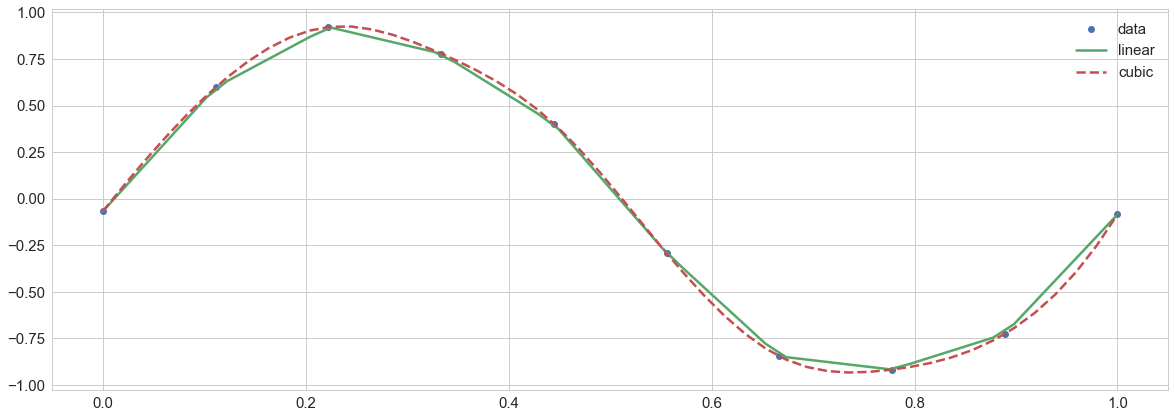

In [33]:
time = np.linspace(0, 1, 50)
lin_approx = linear_interp(time)
cub_approx = cubic_interp(time)

plt.plot(measured_time, measures, 'o', time, lin_approx, '-', 
         time, cub_approx, '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

---

# `scikit-learn`: machine learning in Python

# `scikit-learn`: machine learning in Python

See: <http://scikit-learn.org/stable/>

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

## `scikit-learn`: machine learning in Python

#### * Regression
#### * Clustering
#### * Dimensionality Reduction
#### * Model Selection
#### * Preprocessing

#### Supervised learning
* Regression and classification methods
* All types of models: logistic regression, ridge, SVM, lasso regression, decision trees... up to Neural networks (no GPU support)
* Stochastic Gradient Descent, Nearest-Neighbors,
* Also features semi-supervised learning, ensemble methods, feature selection methods,   Naiive Bayes, and Isotonic Regression

#### Unsupervised learning
* Gaussian Mixture Models, Manifold Learning
* Clustering, Bi-clustering
* PCA, LDA, Outlier detection, Covariance estimation

## `scikit-learn`
#### Definitely check out the examples here: 
    
http://scikit-learn.org/stable/auto_examples/

## Loading an example dataset

First we will load some data to play with. The data we will use is a very simple
flower database known as the Iris dataset.

We have 150 observations of the iris flower specifying some measurements: 

- sepal length, sepal width, petal length and petal width together with its subtype:
*Iris setosa*, *Iris versicolor*, *Iris virginica*.

To load the dataset into a Python object:

In [35]:
from sklearn import datasets
iris = datasets.load_iris()

This data is stored in the `.data` member, which is a `(n_samples, n_features)`
array.

In [36]:
print(iris.keys(), end = end_string)
print(iris.target.shape, end = end_string)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
--------------------------------------------------
(150,)
--------------------------------------------------


The class of each observation is stored in the `.target` attribute of the
dataset. This is an integer 1D array of length `n_samples`:

In [37]:
print(iris.target.shape)
np.unique(iris.target)

(150,)


array([0, 1, 2])

## k-Nearest neighbors classifier

The simplest possible classifier is the nearest neighbor: given a new
observation, take the label of the training samples closest to it in
*n*-dimensional space, where *n* is the number of *features* in each sample.

The k-nearest neighbors classifier internally uses an algorithm based on
ball trees to represent the samples it is trained on.

## k-Nearest neighbors classifier

![image](../Data/11-fig/iris_knn.png)

## k-Nearest neighbors classifier
```python
# Create and fit a nearest-neighbor classifier
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)
```

```python
knn.predict([[0.1, 0.2, 0.3, 0.4]])
```

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

knn.fit(iris.data, iris.target)

knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

In [13]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Training set and testing set

When experimenting with learning algorithms, it is important not to test the
prediction of an estimator on the data used to fit the estimator. 

Indeed, with the kNN estimator, we would always get perfect prediction on the training set.

In [25]:
### Manually
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]
knn.fit(iris.data[:100], iris.target[:100])
knn.score(iris.data[100:], iris.target[100:])

0.98

In [26]:
# Preferred
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# split holding out 40 % 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# We are drastically reducing the size of our training data, better to do k-fold cross validation 
scores = cross_val_score(knn, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(90, 4) (90,) (60, 4) (60,)
Accuracy: 0.96 (+/- 0.05)



## K-means clustering

The simplest clustering algorithm is k-means. This divides a set into *k*
clusters, assigning each observation to a cluster so as to minimize the distance
of that observation (in *n*-dimensional space) to the cluster's mean; the means
are then recomputed. This operation is run iteratively until the clusters
converge, for a maximum for `max_iter` rounds.

(An alternative implementation of k-means is available in SciPy's `cluster`
package. The `scikit-learn` implementation differs from that by offering an
object API and several additional features, including smart initialization.)

In [31]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
labels= k_means.fit_predict(iris.data)
(iris.data)
print(labels[::10])
print(iris.target[::10])

[2 2 1 2 2 1 1 1 1 0 0 1 1 1 2]
[2 2 1 2 2 2 2 1 2 0 0 1 1 1 2]



## Attribution

This notebook is a Jupyter Notebook port of the `scikit-learn` lecture from the
open source [Scipy Lecture Notes][scipy-lec-notes] by Fabian Pedregosa and Gael
Varoquaux.

[scipy-lec-notes]: http://www.scipy-lectures.org/




## Another Example

```pandas + statsmodels + sklearn```

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline

pd.set_option('display.max_rows', 10)

In [67]:
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [68]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [69]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [70]:
print("Affair proportion by childre: \n \n {}\n".format(dta.groupby('children')['affair'].mean()))
print("Affair proportion by age: \n \n {}".format(dta.groupby('age')['affair'].mean()))

Affair proportion by childre: 
 
 children
0.0    0.207954
1.0    0.355479
2.0    0.410533
3.0    0.411012
4.0    0.399390
5.5    0.389163
Name: affair, dtype: float64

Affair proportion by age: 
 
 age
17.5    0.093525
22.0    0.225556
27.0    0.327809
32.0    0.397568
37.0    0.425868
42.0    0.385876
Name: affair, dtype: float64


In [71]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


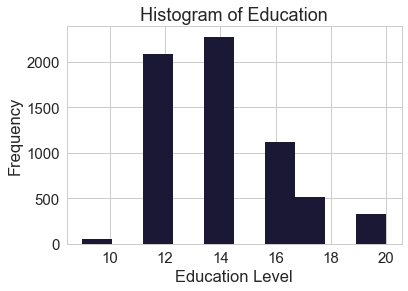

In [72]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
_ = plt.ylabel('Frequency')

In [76]:
sns.set(rc={"figure.figsize": (20, 12), "lines.linewidth": 2.5}, font_scale=1.5)
sns.set_style("whitegrid")
np.random.seed(0)
sns.set_palette((sns.color_palette("rainbow", 8)))

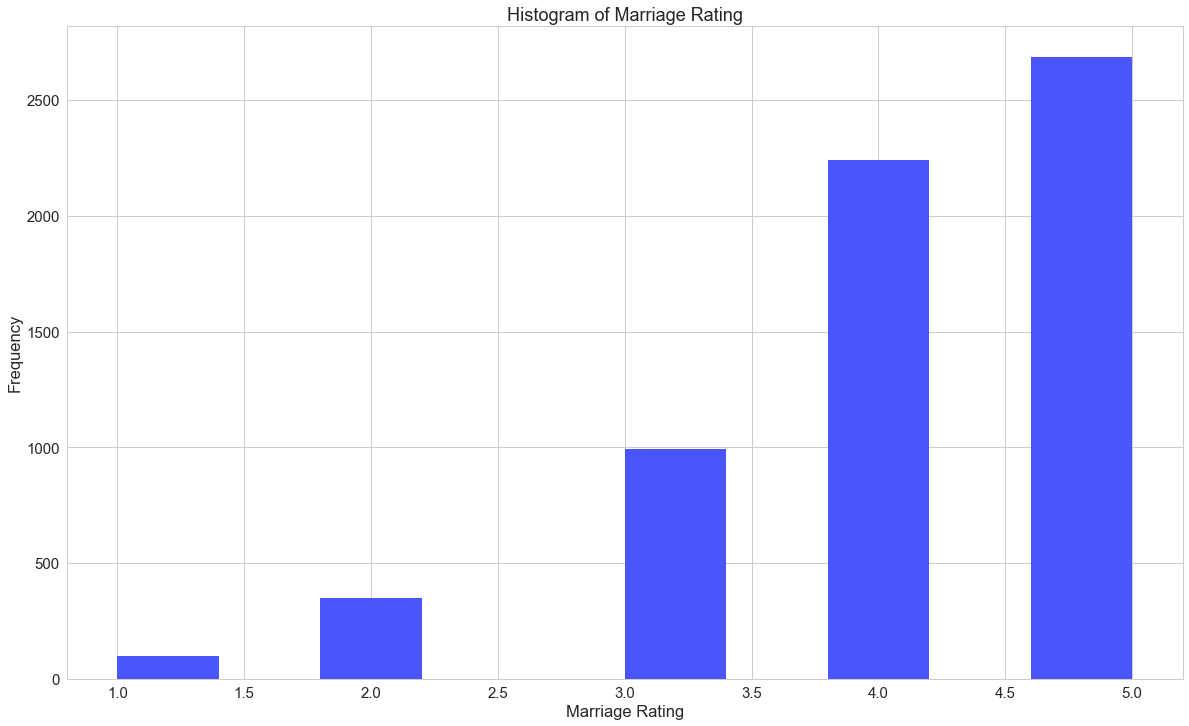

In [77]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
_ = plt.ylabel('Frequency')

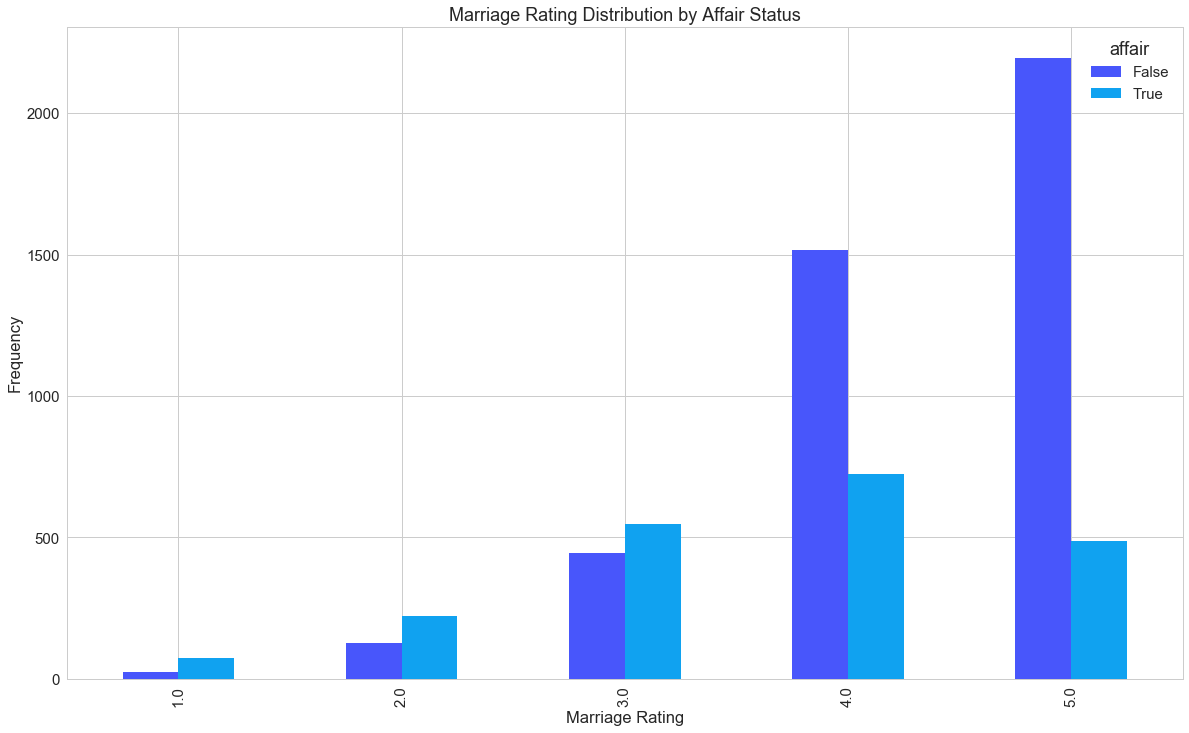

In [78]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
_ = plt.ylabel('Frequency')

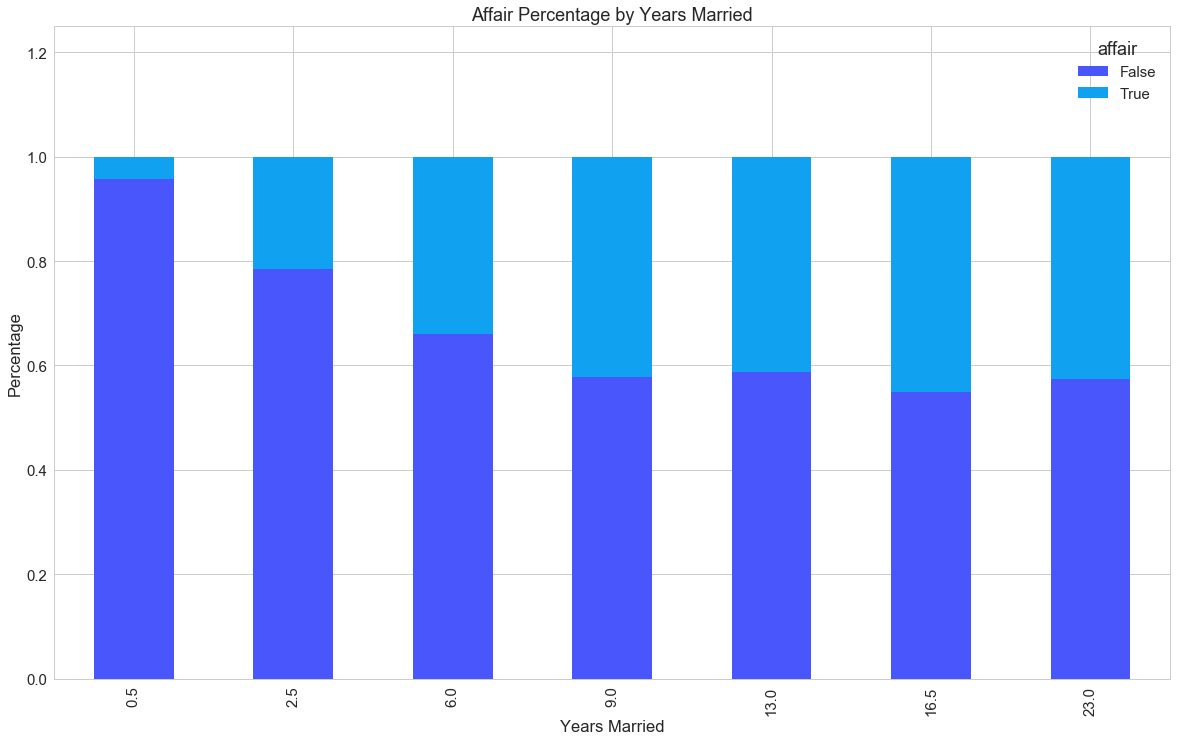

In [79]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylim([0,1.25])
_ = plt.ylabel('Percentage')

# Logistic Regression

In [88]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [89]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [90]:
y = np.ravel(y)

In [91]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [92]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [93]:
y.mean()

0.3224945020420987

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print("Predicted {} affairs in {} points".format(predicted.sum(), X_test.shape[0]))

Predicted 359.0 affairs in 1910 points


In [97]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.35146338 0.64853662]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727384 0.44272616]
 [0.81207045 0.18792955]
 [0.74734602 0.25265398]]


In [98]:
# generate evaluation metrics

roc_auc = metrics.roc_auc_score(y_test, probs[:, 1])
acc = metrics.accuracy_score(y_test, predicted)
print("Accuracy score: {}".format(acc), end = end_string)
print("ROC-AUC score {}".format(roc_auc))

Accuracy score: 0.7298429319371728
--------------------------------------------------
ROC-AUC score 0.745950606950631


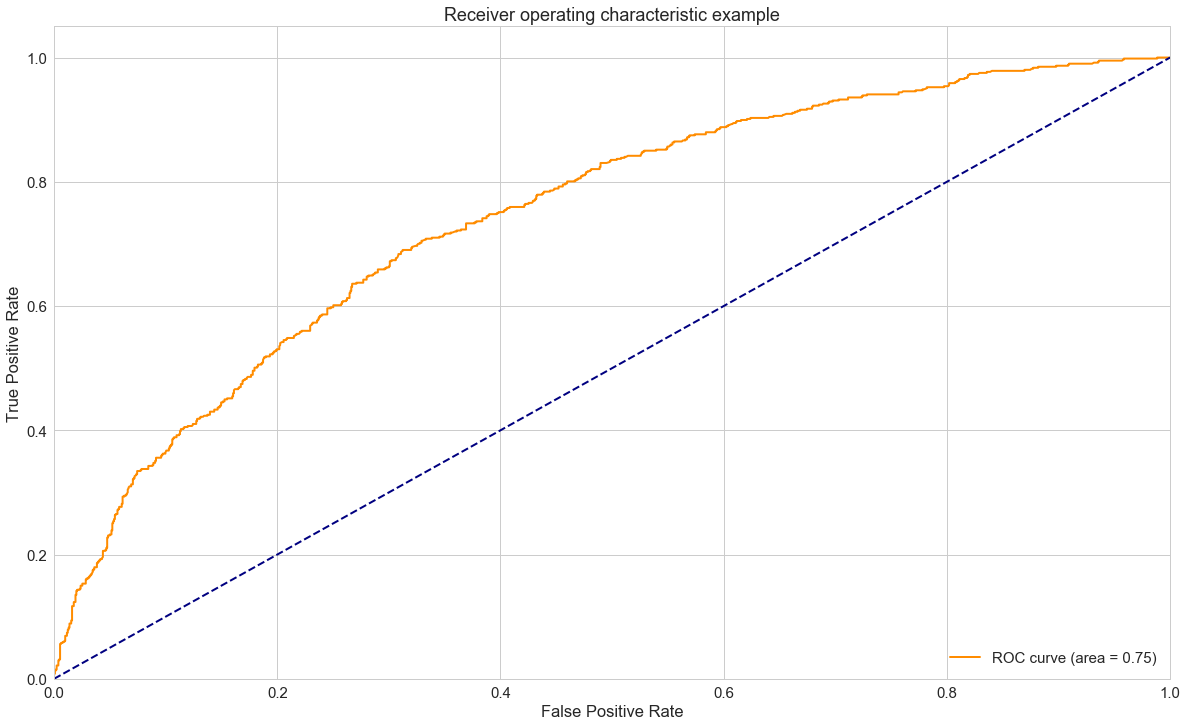

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [100]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
conf_matrix= metrics.confusion_matrix(y_test, predicted)
print(conf_matrix,end = end_string)

[[1169  134]
 [ 382  225]]
--------------------------------------------------


Confusion matrix, without normalization
[[1169  134]
 [ 382  225]]


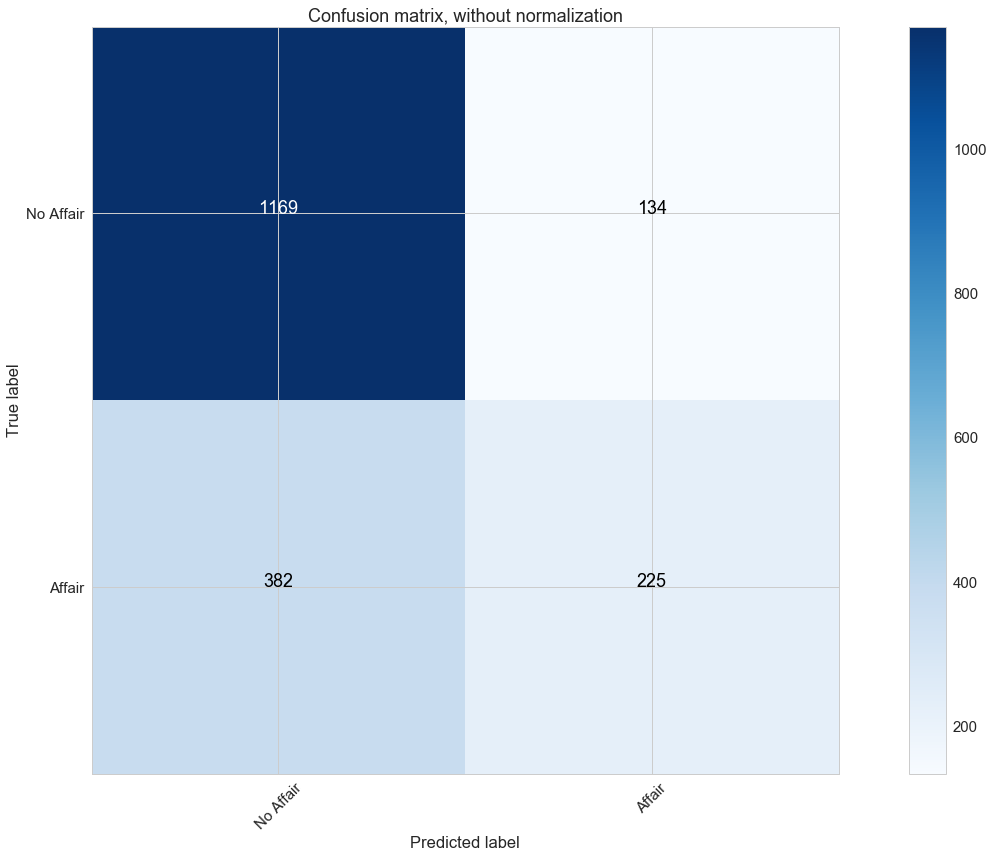

In [102]:
plot_confusion_matrix(conf_matrix, classes=['No Affair', 'Affair'],
                      title='Confusion matrix, without normalization')


In [32]:
# Classification report
report =metrics.classification_report(y_test, predicted)
print(report)

NameError: name 'metrics' is not defined

# More packages for optimization

- Convex optimization: ```cvxpy```
- Neural Networks
 - Tensorflow
 - Keras
 - PyTorch